<a href="https://colab.research.google.com/github/kajalpanda1/ML-Assignments/blob/master/Titanic_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

In [ ]:
from google.colab import files
uploaded=files.upload()

In [ ]:
import io
df1=pd.read_csv(io.StringIO(uploaded['Titanic.csv'].decode('utf-8')))

In [ ]:
print(df1)

     PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0              1         0       3  ...   7.2500   NaN         S
1              2         1       1  ...  71.2833   C85         C
2              3         1       3  ...   7.9250   NaN         S
3              4         1       1  ...  53.1000  C123         S
4              5         0       3  ...   8.0500   NaN         S
..           ...       ...     ...  ...      ...   ...       ...
151          152         1       1  ...  66.6000    C2         S
152          153         0       3  ...   8.0500   NaN         S
153          154         0       3  ...  14.5000   NaN         S
154          155         0       3  ...   7.3125   NaN         S
155          156         0       1  ...  61.3792   NaN         C

[156 rows x 12 columns]


In [ ]:
df1.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  156 non-null    int64  
 1   Survived     156 non-null    int64  
 2   Pclass       156 non-null    int64  
 3   Name         156 non-null    object 
 4   Sex          156 non-null    object 
 5   Age          126 non-null    float64
 6   SibSp        156 non-null    int64  
 7   Parch        156 non-null    int64  
 8   Ticket       156 non-null    object 
 9   Fare         156 non-null    float64
 10  Cabin        31 non-null     object 
 11  Embarked     155 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 14.8+ KB


In [ ]:
df1.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
df1.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,156.000000,156.000000,156.000000,126.000000,156.000000,156.000000,156.000000
mean,78.500000,0.346154,2.423077,28.141508,0.615385,0.397436,28.109587
std,45.177428,0.477275,0.795459,14.613880,1.056235,0.870146,39.401047
min,1.000000,0.000000,1.000000,0.830000,0.000000,0.000000,6.750000
25%,39.750000,0.000000,2.000000,19.000000,0.000000,0.000000,8.003150
50%,78.500000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,117.250000,1.000000,3.000000,35.000000,1.000000,0.000000,30.371850
max,156.000000,1.000000,3.000000,71.000000,5.000000,5.000000,263.000000


In [ ]:
df1.isnull().sum().sort_values(ascending=False)

Cabin          125
Age             30
Embarked         1
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [ ]:
total=df1.isnull().sum().sort_values(ascending=False)
percent_1=df1.isnull().sum()/df1.isnull().count()*100
percent_2=(round(percent_1,1)).sort_values(ascending=False)
missing_data=pd.concat([total,percent_2],axis=1,keys=['Total','%'])
missing_data.head(5)

,Total,%
Cabin,125,80.1
Age,30,19.2
Embarked,1,0.6
Fare,0,0.0
Ticket,0,0.0


In [ ]:
df1.Survived.value_counts()

0    102
1     54
Name: Survived, dtype: int64

In [ ]:
plt=df1.Survived.value_counts().plot(kind='bar',color=['r','b'])
plt.set_xlabel('Survived or not')
plt.set_ylabel('Passenger Count')

NameError: ignored

Text(0, 0.5, 'Survival Probability')

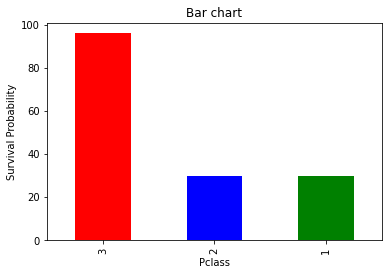

In [ ]:
plt=df1.Pclass.value_counts().plot(kind='bar',title='Bar chart',color=['r','b','g'])
plt.set_xlabel('Pclass')
plt.set_ylabel('Survival Probability')

In [ ]:
df1[['Pclass','Survived']].groupby('Pclass').count()

,Survived
Pclass,
1,30
2,30
3,96


Text(0, 0.5, 'Survival Probability')

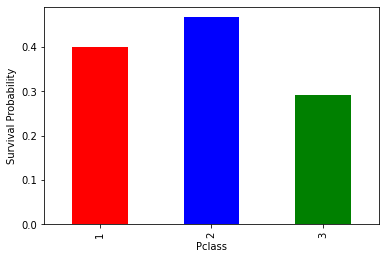

In [ ]:
plt=df1[['Pclass','Survived']].groupby('Pclass').mean().Survived.plot(kind='bar',color=['r','b','g'])
plt.set_xlabel('Pclass')
plt.set_ylabel('Survival Probability')

Text(0, 0.5, 'Passenger Count')

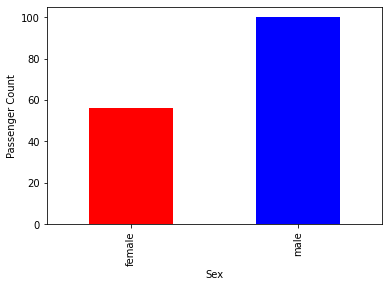

In [ ]:
plt=df1.Sex.value_counts().sort_index().plot(kind='bar',color=['r','b'])
plt.set_xlabel('Sex')
plt.set_ylabel('Passenger Count')

Text(0, 0.5, 'Survival Probability')

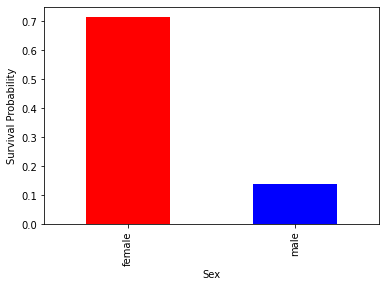

In [ ]:
plt=df1[['Sex','Survived']].groupby('Sex').mean().Survived.plot(kind='bar',color=['r','b','g'])
plt.set_xlabel('Sex')
plt.set_ylabel('Survival Probability')

Text(0, 0.5, 'Passenger Count')

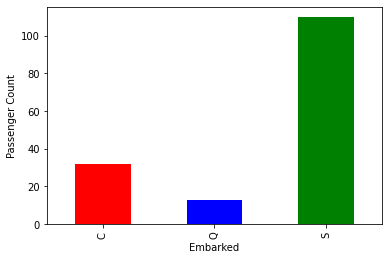

In [ ]:
plt=df1.Embarked.value_counts().sort_index().plot(kind='bar',color=['r','b','g'])
plt.set_xlabel('Embarked')
plt.set_ylabel('Passenger Count')

Text(0, 0.5, 'Survival Probability')

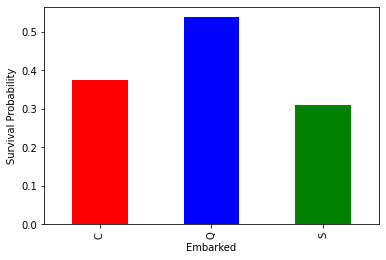

In [ ]:
plt=df1[['Embarked','Survived']].groupby('Embarked').mean().Survived.plot(kind='bar',color=['r','b','g'])
plt.set_xlabel('Embarked')
plt.set_ylabel('Survival Probability')

Text(0, 0.5, 'Passenger Count')

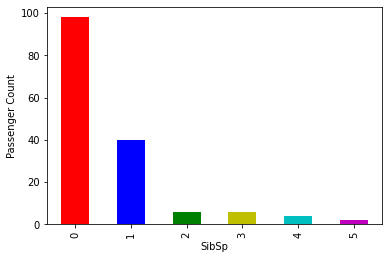

In [ ]:
plt=df1.SibSp.value_counts().sort_index().plot(kind='bar',color=['r','b','g','y','c','m'])
plt.set_xlabel('SibSp')
plt.set_ylabel('Passenger Count')

Text(0, 0.5, 'Survival Probability')

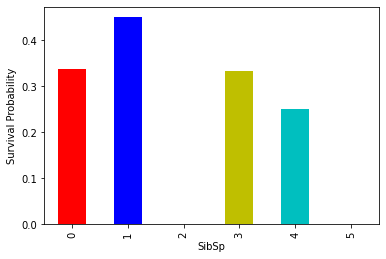

In [ ]:
plt=df1[['SibSp','Survived']].groupby('SibSp').mean().Survived.plot(kind='bar',color=['r','b','g','y','c','m'])
plt.set_xlabel('SibSp')
plt.set_ylabel('Survival Probability')

Text(0, 0.5, 'Passenger Count')

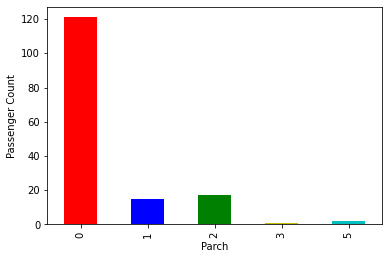

In [ ]:
plt=df1.Parch.value_counts().sort_index().plot(kind='bar',color=['r','b','g','y','c'])
plt.set_xlabel('Parch')
plt.set_ylabel('Passenger Count')

Text(0, 0.5, 'Survival Probability')

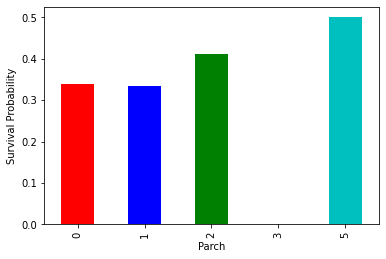

In [ ]:
plt=df1[['Parch','Survived']].groupby('Parch').mean().Survived.plot(kind='bar',color=['r','b','g','y','c'])
plt.set_xlabel('Parch')
plt.set_ylabel('Survival Probability')

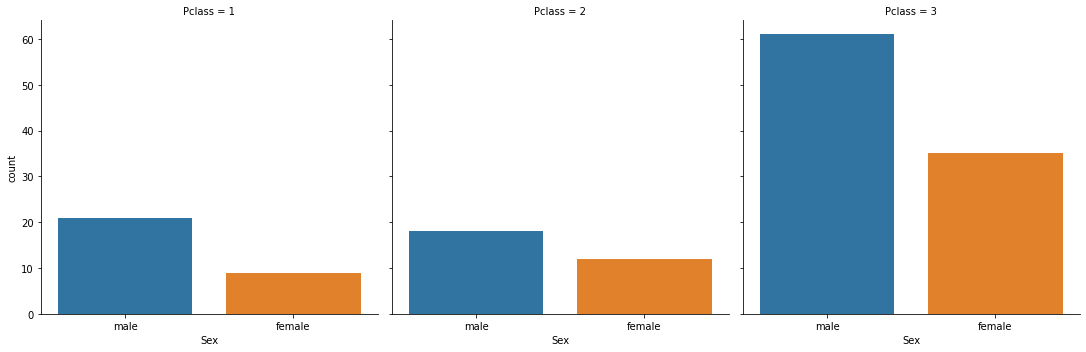

In [ ]:
sns.catplot('Sex',col='Pclass',data=df1,kind='count')

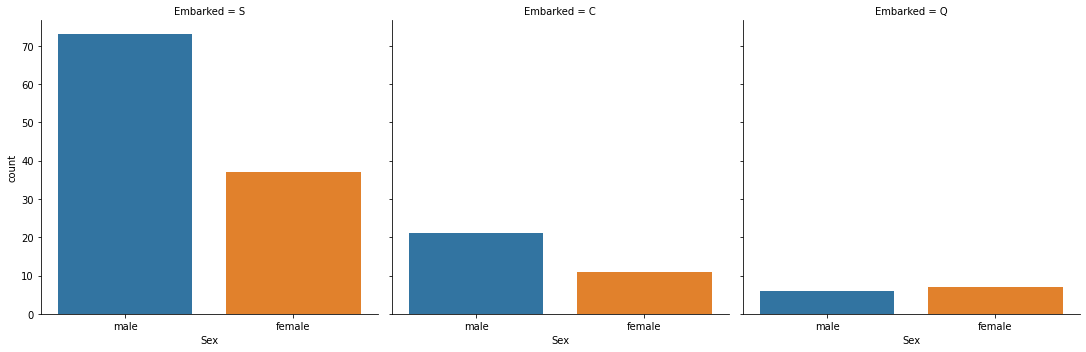

In [ ]:
sns.catplot('Sex',col='Embarked',data=df1,kind='count')

In [ ]:
df1['FamilySize']=df1['SibSp']+df1['Parch']+1

In [ ]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [ ]:
df1=df1.drop(columns=['Ticket','PassengerId','Cabin'])

In [ ]:
df1.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [ ]:
df1['Sex']=df1['Sex'].map({'male':0,'female':1})
df1['Embarked']=df1['Embarked'].map({'C':0,'Q':1,'S':2})

In [ ]:
df1.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,2.0,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,0.0,2
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,2.0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,2.0,2
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,2.0,1


In [ ]:
df1.Embarked.value_counts()#get distinct values of a column

2.0    110
0.0     32
1.0     13
Name: Embarked, dtype: int64

In [ ]:
df1['Title']=df1['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)#
df1=df1.drop(columns='Name')

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    156 non-null    int64  
 1   Pclass      156 non-null    int64  
 2   Sex         156 non-null    int64  
 3   Age         126 non-null    float64
 4   SibSp       156 non-null    int64  
 5   Parch       156 non-null    int64  
 6   Fare        156 non-null    float64
 7   Embarked    155 non-null    float64
 8   FamilySize  156 non-null    int64  
 9   Title       156 non-null    object 
dtypes: float64(3), int64(6), object(1)
memory usage: 12.3+ KB


In [ ]:
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Title
0,0,3,0,22.0,1,0,7.2500,2.0,2,Mr
1,1,1,1,38.0,1,0,71.2833,0.0,2,Mrs
2,1,3,1,26.0,0,0,7.9250,2.0,1,Miss
3,1,1,1,35.0,1,0,53.1000,2.0,2,Mrs
4,0,3,0,35.0,0,0,8.0500,2.0,1,Mr


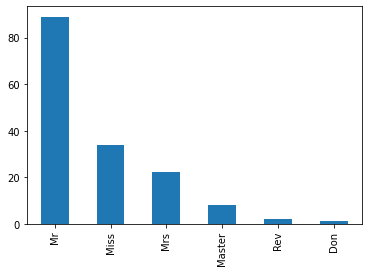

In [ ]:
df1.Title.value_counts().plot(kind='bar')

In [ ]:
df1['Title']=df1['Title'].replace(['Rev','Don'],'Others')

Text(0, 0.5, 'Passenger Count')

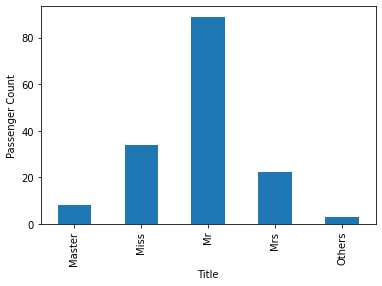

In [ ]:
plt=df1.Title.value_counts().sort_index().plot(kind='bar')
plt.set_xlabel('Title')
plt.set_ylabel('Passenger Count')

In [ ]:
df1['Title']=df1['Title'].map({'Master':0,'Miss':1,'Mr':2,'Mrs':3,'Others':4})

In [ ]:
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Title
0,0,3,0,22.0,1,0,7.2500,2.0,2,2
1,1,1,1,38.0,1,0,71.2833,0.0,2,3
2,1,3,1,26.0,0,0,7.9250,2.0,1,1
3,1,1,1,35.0,1,0,53.1000,2.0,2,3
4,0,3,0,35.0,0,0,8.0500,2.0,1,2


In [ ]:
corr_matrix=df1.corr()

In [ ]:
corr_matrix

,Survived,Pclass,Sex,Fare,Embarked,FamilySize,Title
Survived,1.000000,-0.116340,0.579062,0.029343,-0.072072,-0.022543,-0.109155
Pclass,-0.116340,1.000000,0.038892,-0.607256,0.115187,0.066083,-0.232776
Sex,0.579062,0.038892,1.000000,0.006689,-0.022350,0.176728,-0.069561
Fare,0.029343,-0.607256,0.006689,1.000000,-0.112638,0.315303,0.028434
Embarked,-0.072072,0.115187,-0.022350,-0.112638,1.000000,0.102890,0.001412
FamilySize,-0.022543,0.066083,0.176728,0.315303,0.102890,1.000000,-0.311945
Title,-0.109155,-0.232776,-0.069561,0.028434,0.001412,-0.311945,1.000000


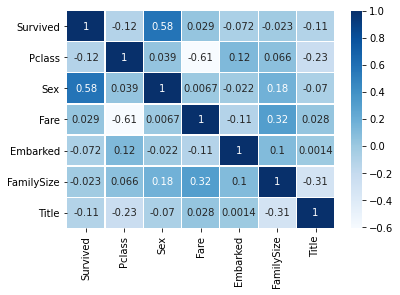

In [ ]:
sns.heatmap(data=corr_matrix,cmap='Blues',annot=True,linewidths=0.2)

In [ ]:
df1.Embarked.value_counts()

2.0    110
0.0     32
1.0     13
Name: Embarked, dtype: int64

In [ ]:
df1['Embarked']=df1['Embarked'].fillna(2)
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Title
0,0,3,0,22.0,1,0,7.2500,2.0,2,2
1,1,1,1,38.0,1,0,71.2833,0.0,2,3
2,1,3,1,26.0,0,0,7.9250,2.0,1,1
3,1,1,1,35.0,1,0,53.1000,2.0,2,3
4,0,3,0,35.0,0,0,8.0500,2.0,1,2


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    156 non-null    int64  
 1   Pclass      156 non-null    int64  
 2   Sex         156 non-null    int64  
 3   Age         126 non-null    float64
 4   SibSp       156 non-null    int64  
 5   Parch       156 non-null    int64  
 6   Fare        156 non-null    float64
 7   Embarked    156 non-null    float64
 8   FamilySize  156 non-null    int64  
 9   Title       156 non-null    int64  
dtypes: float64(3), int64(7)
memory usage: 12.3 KB


In [ ]:
df1['Age']=df1['Age'].fillna(df1['Age'].median)

In [ ]:
df1.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
FamilySize    0
Title         0
dtype: int64

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    156 non-null    int64  
 1   Pclass      156 non-null    int64  
 2   Sex         156 non-null    int64  
 3   Age         156 non-null    object 
 4   SibSp       156 non-null    int64  
 5   Parch       156 non-null    int64  
 6   Fare        156 non-null    float64
 7   Embarked    156 non-null    float64
 8   FamilySize  156 non-null    int64  
 9   Title       156 non-null    int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 12.3+ KB


In [ ]:
df1=df1.drop(columns='SibSp')

In [ ]:
df1=df1.drop(columns='Parch')

In [ ]:
df1.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'FamilySize',
       'Title'],
      dtype='object')

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    156 non-null    int64  
 1   Pclass      156 non-null    int64  
 2   Sex         156 non-null    int64  
 3   Age         156 non-null    object 
 4   Fare        156 non-null    float64
 5   Embarked    156 non-null    float64
 6   FamilySize  156 non-null    int64  
 7   Title       156 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.9+ KB


In [ ]:
df1.to_csv('Titanic_Cleaned.csv',index=False)
files.download("Titanic_Cleaned.csv")